In [29]:
import tensorflow as tf
import os
import pickle
import pandas as pd
import numpy as np

In [30]:
def get_testing_data(directory,min_length,window_size):
    X = []
    y = []
    n = 60//window_size
    for f in os.listdir(directory):
        if f[0]=='.':
            continue
        data = pickle.load(open(directory+f,'rb'))
        if data.shape[0]//n<min_length:
            continue
        X.append(np.concatenate(list(data['data'])))
        y.extend([f]*data.shape[0])
    return np.concatenate(X),np.array(y)

window_size = 20
activity = 'std25'
n_user  = 315
min_length = 100
data_directory = './data/'+str(window_size)+'/'+activity+'/testing/'
model_directory = './models/'+str(window_size)+'/'+activity+'/'+str(n_user)+'/'
train_lengths = os.listdir(model_directory)
X,y = get_testing_data(data_directory,min_length,window_size)
save_directory = './predictions/'+str(window_size)+'/'+activity+'/'+str(n_user)+'/'
result_directory = './results/'
if not os.path.isdir(save_directory):
    os.makedirs(save_directory)

In [31]:
np.unique(y).shape

(315,)

In [32]:
X.shape

(285139, 500, 3)

In [33]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[1], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

4 Physical GPUs, 1 Logical GPU


In [34]:
from sklearn.metrics import accuracy_score
def get_dictfilename(a):
    a = a.replace('trainedmodel','userdict').replace('hdf5','p')
    return a

def get_predictions(df):
    indexes = np.array(list(df['index']))
    y_pred = model.predict(X_temp[indexes])
    df['y_prob'] = list(y_pred)
    df['y_pred'] = y_pred.argmax(axis=1)
    return df
    

for f in list(os.listdir(model_directory)):
#     if f in os.listdir(save_directory):
#         continue
    print(f)
    model_files = [model_directory+f+'/'+a for a in os.listdir(model_directory+f) if a[-1]=='5']
    dict_files = [get_dictfilename(a) for a in model_files]
    pairs = list(zip(model_files,dict_files))
    predictions_all = []
    for i,a in enumerate(pairs):
        print(i,end=',')
        m_name,d_name = a
        user_dict = pickle.load(open(d_name,'rb'))
        indexes = np.array([i for i in range(len(y)) if y[i] in user_dict.keys()])
        y_temp = y[indexes]
        X_temp = X[indexes]
        y_final = np.array([user_dict[a] for a in y_temp])
        index_df = pd.DataFrame({'user':y_temp,'y':y_final,'index':np.arange(len(y_temp))})
        model = tf.keras.models.load_model(m_name)
        predictions = index_df.groupby('user',as_index=False).apply(get_predictions)
        predictions['iteration'] = i
        predictions_all.append(predictions)
    predictions_all = pd.concat(predictions_all)
    pickle.dump(predictions_all,open(save_directory+f,'wb'))
    print(f,'done')

40
0,40 done
10
0,10 done
60
0,60 done
20
0,20 done
50
0,50 done
210
0,210 done
30
0,30 done
120
0,120 done
90
0,90 done
300
0,300 done
150
0,150 done
240
0,240 done
270
0,270 done
180
0,180 done


40


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 103 tasks      | elapsed:   10.7s
[Parallel(n_jobs=30)]: Done 315 out of 315 | elapsed:   23.1s finished


40 done
10


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    7.2s
[Parallel(n_jobs=30)]: Done 315 out of 315 | elapsed:   19.9s finished


10 done
60


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    7.2s
[Parallel(n_jobs=30)]: Done 315 out of 315 | elapsed:   19.9s finished


60 done
20


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    7.5s
[Parallel(n_jobs=30)]: Done 315 out of 315 | elapsed:   19.8s finished


20 done
50


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    7.5s
[Parallel(n_jobs=30)]: Done 315 out of 315 | elapsed:   19.8s finished


50 done
210


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    7.2s
[Parallel(n_jobs=30)]: Done 315 out of 315 | elapsed:   19.9s finished


210 done
30


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    7.1s
[Parallel(n_jobs=30)]: Done 315 out of 315 | elapsed:   19.9s finished


30 done
120


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    7.4s
[Parallel(n_jobs=30)]: Done 315 out of 315 | elapsed:   19.8s finished


120 done
90


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    7.1s
[Parallel(n_jobs=30)]: Done 315 out of 315 | elapsed:   19.8s finished


90 done
300


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    6.9s
[Parallel(n_jobs=30)]: Done 300 out of 300 | elapsed:   18.4s finished


300 done
150


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    7.2s
[Parallel(n_jobs=30)]: Done 315 out of 315 | elapsed:   19.9s finished


150 done
240


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    7.2s
[Parallel(n_jobs=30)]: Done 315 out of 315 | elapsed:   19.8s finished


240 done
270


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    7.2s
[Parallel(n_jobs=30)]: Done 304 out of 304 | elapsed:   18.5s finished


270 done
180


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:    7.1s
[Parallel(n_jobs=30)]: Done 315 out of 315 | elapsed:   19.8s finished


180 done


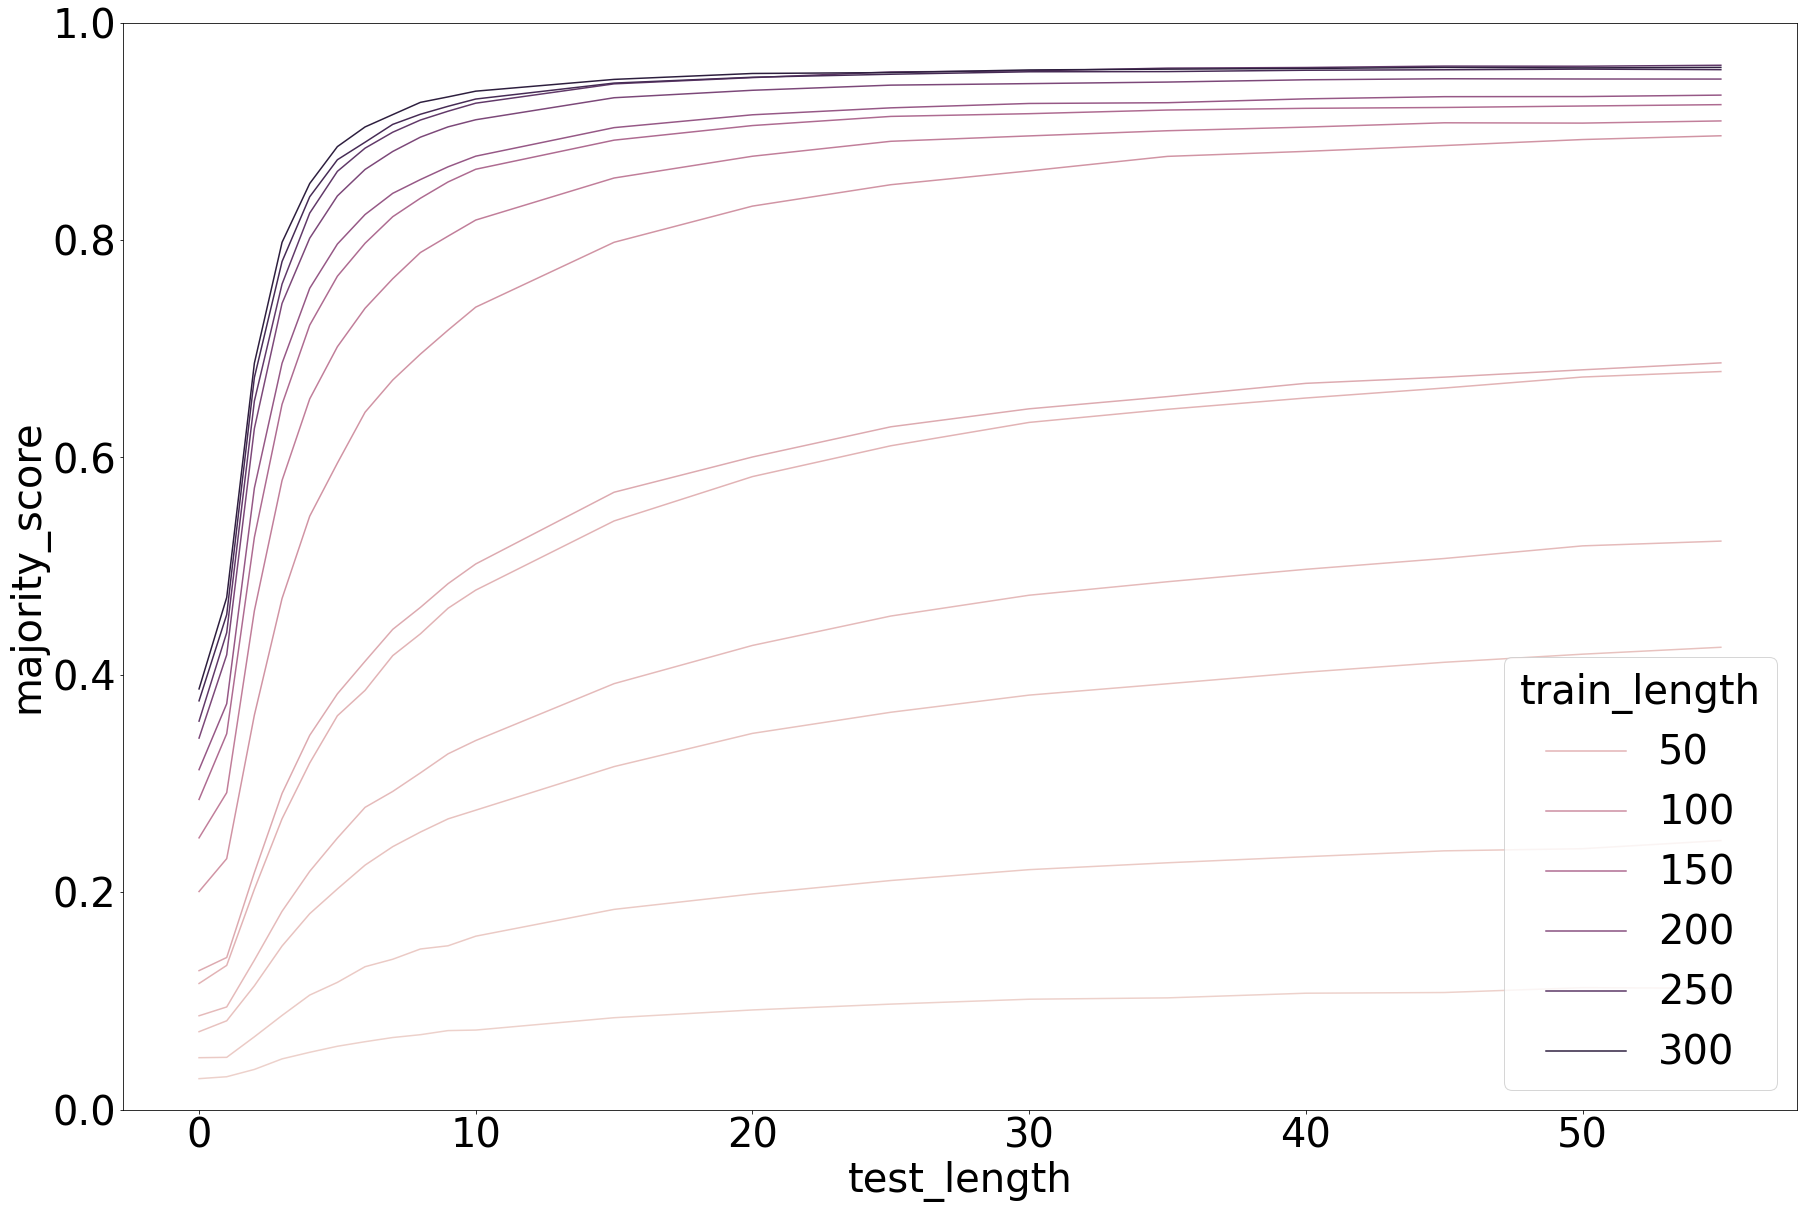

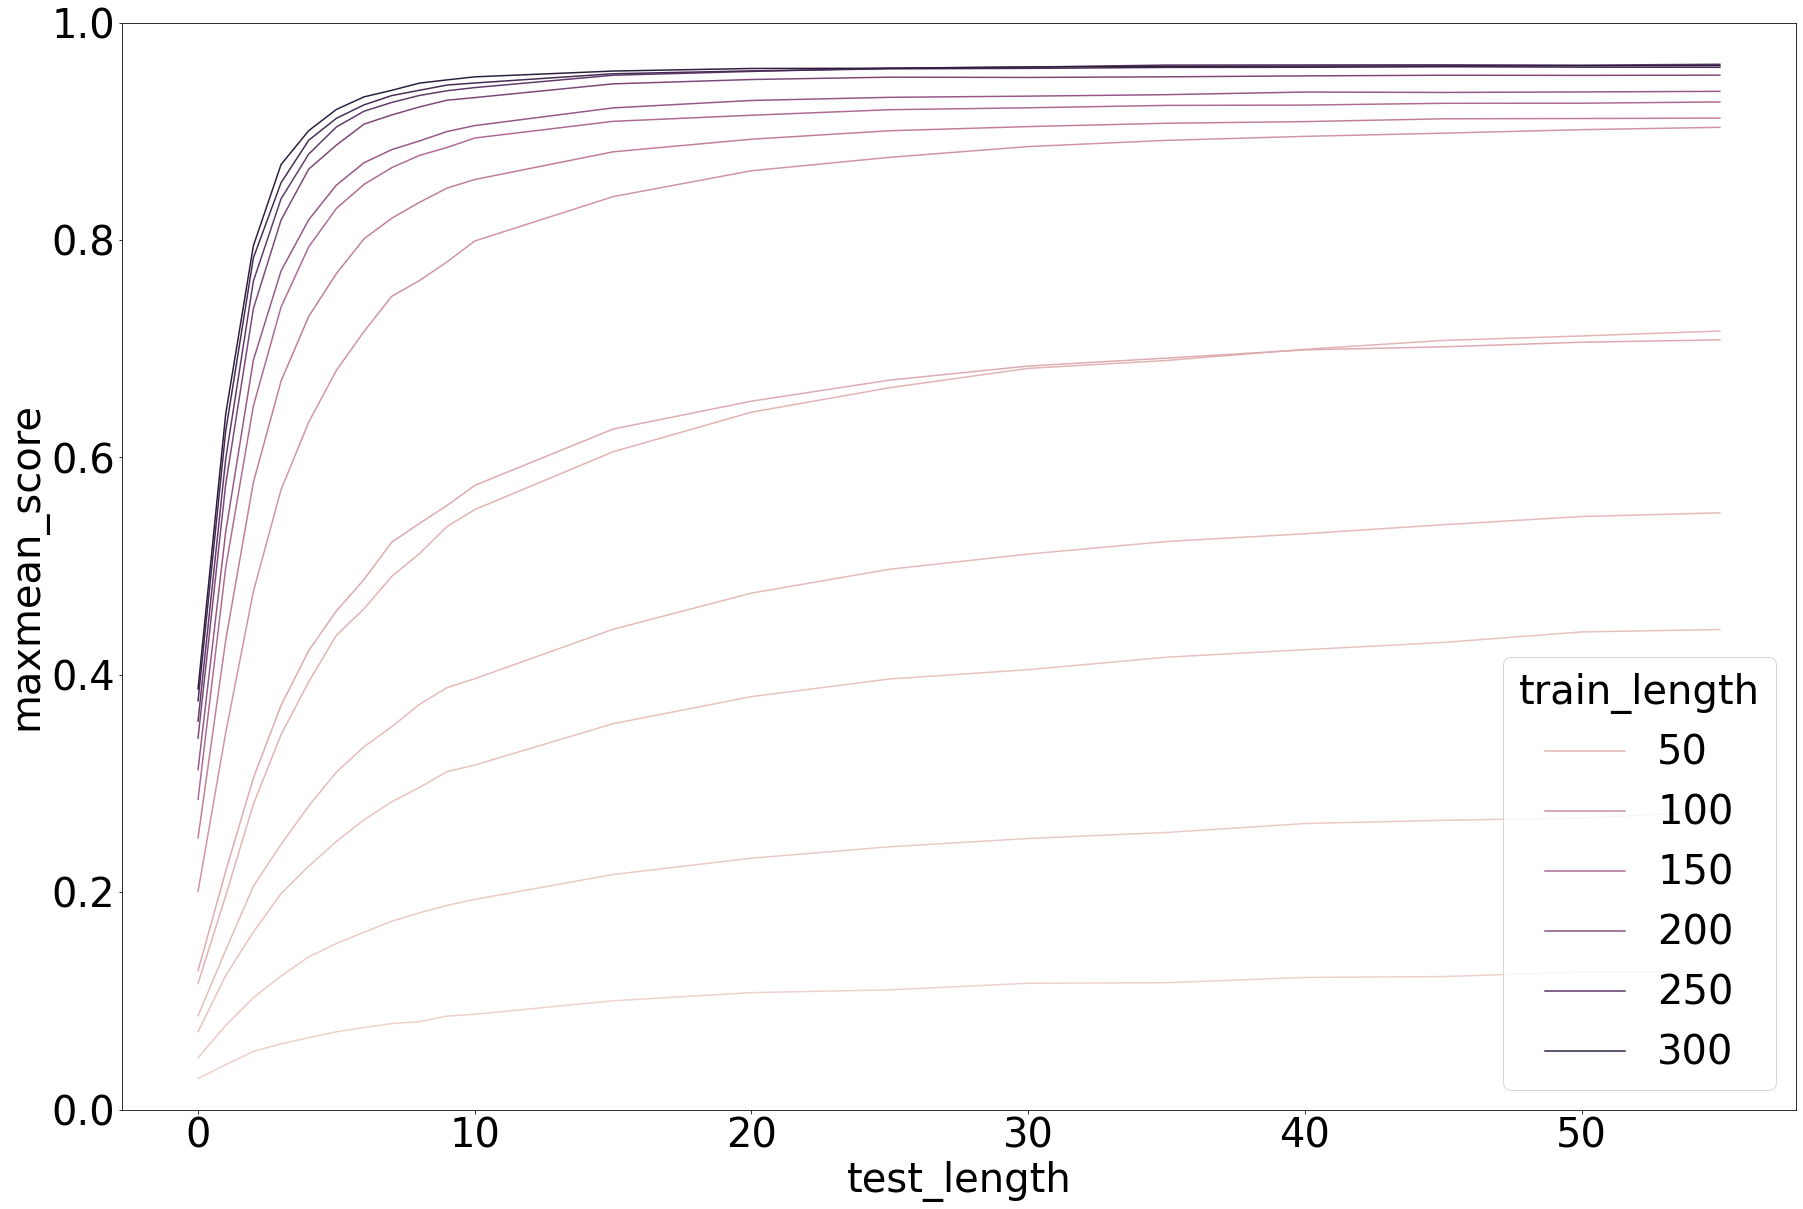

In [35]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode

def get_results(df):
    df['y_prob'] = df['y_prob'].apply(lambda a:a.reshape(1,-1))
    rows = []
    rows.append([0,accuracy_score(df['y'],df['y_pred']),accuracy_score(df['y'],df['y_pred']),np.int64(f),df['user'].values[0],df['iteration'].values[0]])
    for t in test_lengths:
        y_true = []
        y_pred = []
        y_pred_maxmean = []
        for j in range(n_iter):
            n = t*3
            if n>df.shape[0]:
                continue
            temp_df = df.sample(n,replace=False)
            y_true.append(temp_df['y'].values[0])
            y_pred.append(mode(temp_df['y_pred'])[0][0])
            y_pred_maxmean.append(np.concatenate(list(temp_df['y_prob'])).mean(axis=0).argmax())
        rows.append([t,accuracy_score(y_true,y_pred),accuracy_score(y_true,y_pred_maxmean),np.int64(f),df['user'].values[0],df['iteration'].values[0]])
    return pd.DataFrame(rows,columns=['test_length','majority_score',
                                      'maxmean_score','train_length',
                                      'user','iteration'])


import sys
from joblib import Parallel,delayed
if activity=='stationery':
    test_lengths = list(np.arange(1,10,1))+list(np.arange(10,120,10))+list(np.arange(120,240,20))+list(np.arange(240,480,40))
else:
    test_lengths = list(np.arange(1,10,1))+list(np.arange(10,60,5))
n_iter = 100
base_window_size = 20
final_results = []
train_lengths = []

# if activity+'.p' in os.listdir(result_directory):
#     df = pickle.load(open(result_directory+activity+'.p','rb'))
#     final_results.append(df)
#     train_lengths = [str(a) for a in df['train_length'].unique()]
    
for f in os.listdir(save_directory):
    if f in train_lengths:
        continue
    print(f)
    dd = pickle.load(open(save_directory+f,'rb'))
    all_dfs = list(dd.groupby(['user','iteration'],as_index=False))
    all_results = Parallel(n_jobs=30,verbose=2)(delayed(get_results)(all_dfs[k][1]) for k in range(len(all_dfs)))
    results = pd.concat(all_results)
    final_results.append(results)
    pickle.dump(pd.concat(final_results),open(result_directory+activity+'.p','wb'))
    print(f,'done')

results = pickle.load(open(result_directory+activity+'.p','rb'))

final_results = results.groupby(['test_length','iteration','train_length'],as_index=False).mean().groupby(['test_length','train_length'],as_index=False).mean()

import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size':40})
plt.figure(figsize=(30,20))
sns.lineplot(x='test_length',y='majority_score',hue='train_length',data=final_results)
plt.ylim([0,1])
plt.show()
plt.rcParams.update({'font.size':40})
plt.figure(figsize=(30,20))
sns.lineplot(x='test_length',y='maxmean_score',hue='train_length',data=final_results)
plt.ylim([0,1])
plt.show()

def save_data_final():
    final_result_directory = './final_results/'
    if not os.path.isdir(final_result_directory):
        os.makedirs(final_result_directory)
    activity1 = activity
    if activity=='std':
        activity1 += '20'
    maxmean = pd.pivot_table(final_results,columns='train_length',index='test_length',values='maxmean_score',aggfunc='mean')
    maxmean.to_csv(final_result_directory+activity1+'_maxmean.csv')
    majority = pd.pivot_table(final_results,columns='train_length',index='test_length',values='majority_score',aggfunc='mean')
    majority.to_csv(final_result_directory+activity1+'_majority.csv')

save_data_final()

In [36]:
final_results

,test_length,train_length,iteration,majority_score,maxmean_score
0,0,10,0,0.028644,0.028644
1,0,20,0,0.047921,0.047921
2,0,30,0,0.071847,0.071847
3,0,40,0,0.086478,0.086478
4,0,50,0,0.116188,0.116188
...,...,...,...,...,...
275,55,180,0,0.933302,0.936762
276,55,210,0,0.948063,0.951651
277,55,240,0,0.960762,0.961683
278,55,270,0,0.956711,0.958882
